# **Price Correlation Study**

## Objectives

1. Answer business requirement 1: "The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that."
2. Test our hypothesis.

## Inputs

1. House_price_records_clean.csv

## Outputs

1. Code which answers business requirement 1 and can be used to build streamlit app.
2. Data visualisations for the above.
3. Validated or disproved hypothesis.


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing'

# Load Content

Load content and check data.

In [4]:
import numpy as np
import pandas as pd

house_prices_clean_df = pd.read_csv(f"outputs/datasets/clean_data/House_prices_records_clean.csv")

In [5]:
house_prices_clean_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


In [6]:
house_prices_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1460 non-null   object 
 4   BsmtFinSF1    1460 non-null   int64  
 5   BsmtFinType1  1460 non-null   object 
 6   BsmtUnfSF     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageFinish  1460 non-null   object 
 9   GarageYrBlt   1460 non-null   float64
 10  GrLivArea     1460 non-null   int64  
 11  KitchenQual   1460 non-null   object 
 12  LotArea       1460 non-null   int64  
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

---

# Transform Categorical data.

To perform the correlation study we need all our data to be of a numerical data type. As these are ratings of quality ratings (i.e. low-high) we can do this with the Ordinal Encoder, and on this occassion we will specify the order of the variables. We have already seen in the feature engineering notebook that this does not adversely affect the data.

Note that OverallCond and OverallQual are already numbers so action is needed here.

Get the columns which are still objects and there associated categories.

In [7]:
cat_columns = house_prices_clean_df.columns[house_prices_clean_df.dtypes=='object'].to_list()

for columns in cat_columns:
   print(columns)
   print(house_prices_clean_df[columns].unique())

BsmtExposure
['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'None' 'BLQ' 'LwQ']
GarageFinish
['RFn' 'Unf' 'None' 'Fin']
KitchenQual
['Gd' 'TA' 'Ex' 'Fa']


We manually order the variables, reflecting low to high quality and apply the ordinal encoder. We can see the variables have been transformed.

In [8]:
from sklearn.preprocessing import OrdinalEncoder

# Aspects of this code were inspired by this discussion on Stack Exchange.
# https://datascience.stackexchange.com/questions/72343/encoding-with-ordinalencoder-how-to-give-levels-as-user-input

bsmt_exposure_categories = ['None', 'No', 'Mn', 'Av', 'Gd']
bsmt_fin_type1_categories = [ 'None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
garage_finish_categories = ['None', 'Unf', 'RFn', 'Fin']
kitchen_quality_categories = ['Fa', 'TA', 'Gd', 'Ex']

categories = [bsmt_exposure_categories, bsmt_fin_type1_categories, garage_finish_categories, kitchen_quality_categories]
encoder = OrdinalEncoder(categories=categories, dtype='int64')
house_prices_clean_df[house_prices_clean_df.select_dtypes(include='object').columns] = encoder.fit_transform(X=house_prices_clean_df.select_dtypes(include='object'))
house_prices_clean_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,1,706,6,150,548,2,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,4,978,5,284,460,2,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,2,486,6,434,608,2,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,1,216,5,540,642,1,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,3,655,6,490,836,2,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


---

## Correlation study

To check the correlation we can look at both Pearson and Spearman correlations. Pearson is a suitable study for the features which are numerical and continuous. Spearman is more suitable for ordinal data types. We can apply both and assess the results.

In both cases we check every value against SalePrice and list the results in order (removing SalePrice from the top of the list).

In [9]:
corr_spearman = house_prices_clean_df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
GarageYrBlt     0.563256
OpenPorchSF     0.477561
GarageFinish    0.463387
LotArea         0.456461
MasVnrArea      0.415906
LotFrontage     0.375590
BsmtExposure    0.344207
BsmtFinType1    0.305899
BsmtFinSF1      0.301871
2ndFlrSF        0.279845
BedroomAbvGr    0.223576
BsmtUnfSF       0.185197
OverallCond    -0.129325
Name: SalePrice, dtype: float64

In [10]:
corr_pearson = house_prices_clean_df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.466754
GarageFinish    0.404100
BsmtFinSF1      0.386420
BsmtExposure    0.374696
LotFrontage     0.334771
OpenPorchSF     0.315856
2ndFlrSF        0.312479
LotArea         0.263843
BsmtFinType1    0.253330
BsmtUnfSF       0.214479
BedroomAbvGr    0.155784
OverallCond    -0.077856
Name: SalePrice, dtype: float64

Both correlations rate a correlation coefficient of 0.6 or higher as strongly correlated and 0.8 as very strongly correlated.

Both correlation studies produce some high correlations and agree on the order of the top three most important features (OverallQual, GrLivArea, KitchenQual). There is some divergence thereafter.

We note that while Spearman is a more suitable test for ordinal variables and indicates lower overall correlation coefficient, it still indicates that OverallQual and KitchenQual are either strongly or very strongly  correlated. It also agrees with the Pearson correlation regarding their relative importance (first and third respectively).  

We can add the scores together and extract features with a combined score of 1.2 or higher (i.e. scores which average 0.6 or higher).

In [11]:
combined_correlation = corr_pearson + corr_spearman
study_further = 1.2

combined_correlation = {
    'Spearman': corr_spearman,
    'Pearson': corr_pearson,
    'Score': combined_correlation.sort_values(ascending=False),
    'Study': combined_correlation.sort_values(ascending=False) >= study_further
}

combined_correlation_df = pd.DataFrame.from_dict(combined_correlation)#.query(f'Study == True')
combined_correlation_df.sort_values(by = 'Score', ascending = False) 


,Spearman,Pearson,Score,Study
OverallQual,0.809829,0.790982,1.600810,True
GrLivArea,0.731310,0.708624,1.439934,True
KitchenQual,0.672849,0.659600,1.332448,True
GarageArea,0.649379,0.623431,1.272810,True
TotalBsmtSF,0.602725,0.613581,1.216306,True
1stFlrSF,0.575408,0.605852,1.181260,False
YearBuilt,0.652682,0.522897,1.175579,False
YearRemodAdd,0.571159,0.507101,1.078260,False
GarageYrBlt,0.563256,0.466754,1.030010,False
MasVnrArea,0.415906,0.472614,0.888521,False


And extract the catagories we wish to study

In [12]:
categories_to_study_df = pd.DataFrame.from_dict(combined_correlation).query(f'Study == True')
categories_to_study_df.sort_values(by = 'Score', ascending = False)

,Spearman,Pearson,Score,Study
OverallQual,0.809829,0.790982,1.600810,True
GrLivArea,0.731310,0.708624,1.439934,True
KitchenQual,0.672849,0.659600,1.332448,True
GarageArea,0.649379,0.623431,1.272810,True
TotalBsmtSF,0.602725,0.613581,1.216306,True


We save the data frame so we can display it to the streamlit dashboard

In [13]:
import os
try:
  os.makedirs(name='outputs/datasets/correlation_study')
except Exception as e:
  print(e)

categories_to_study_df.to_csv(f"outputs/datasets/correlation_study/categories_to_study_df.csv",index=False)
combined_correlation_df.to_csv(f"outputs/datasets/correlation_study/combined_correlation_df.csv",index=False)

We can also visualise the importance of the relationships to present to the client.

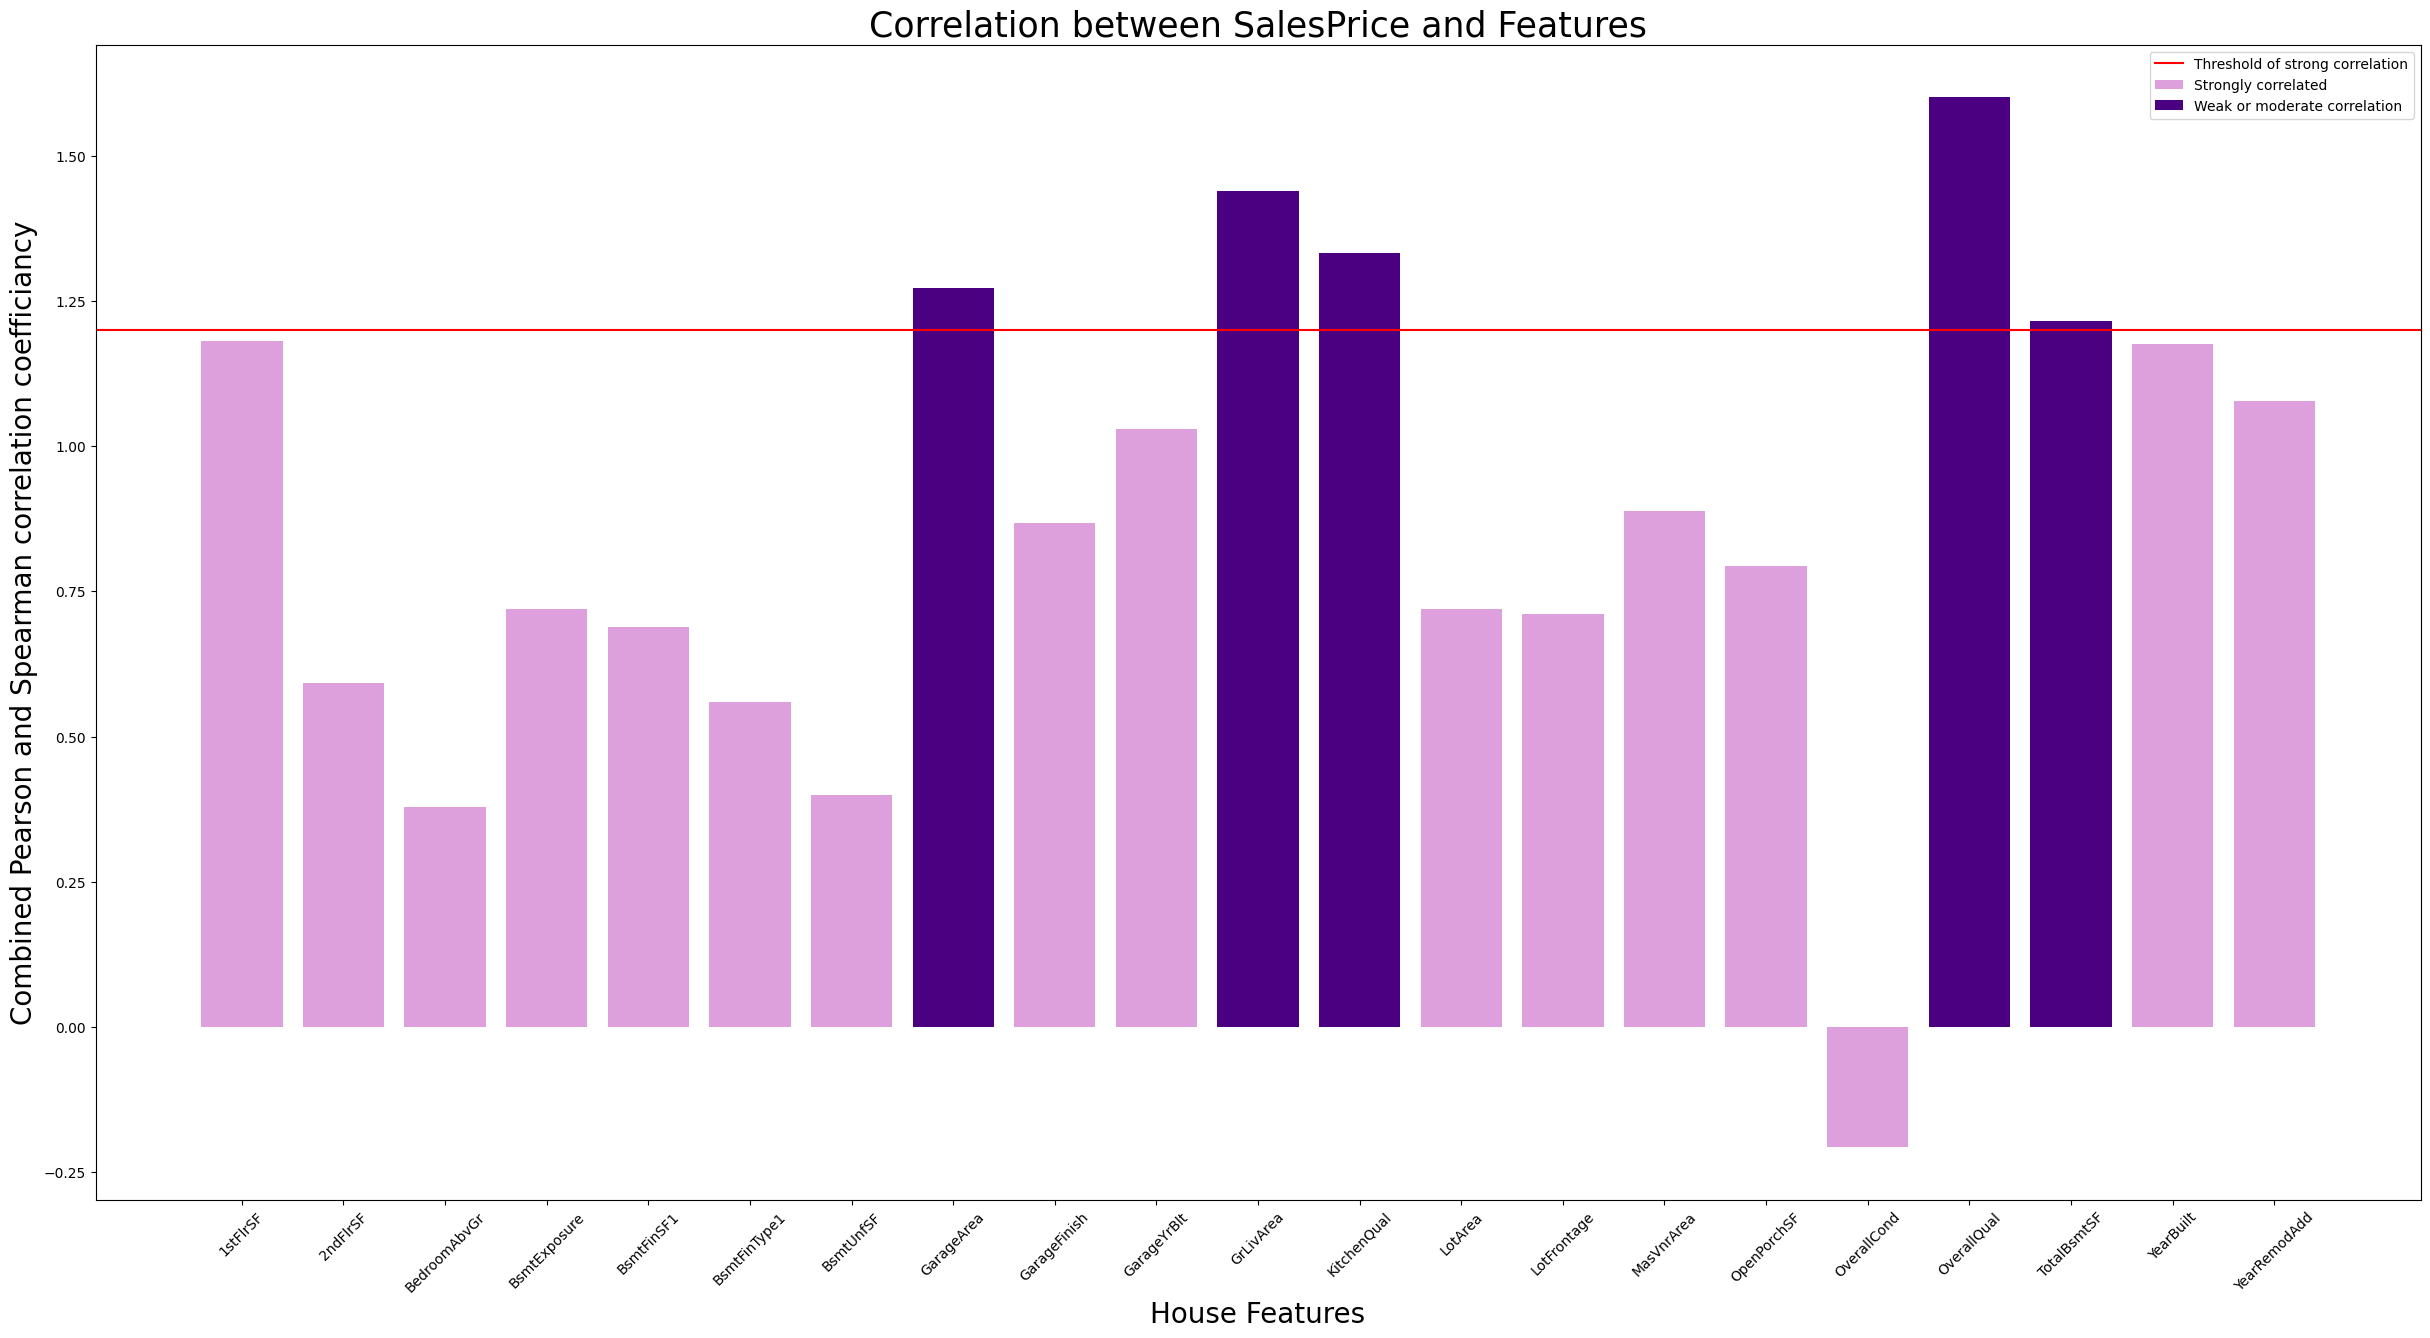

In [14]:
import matplotlib.pyplot as plt

# Bar plot showing combined Pearson and Spearman correlation coefficiancies
plt.figure(figsize=(30, 15))
plt.bar(combined_correlation_df.index, combined_correlation_df["Score"],
    color = 'plum', label = "Strongly correlated")
plt.bar(categories_to_study_df.index, categories_to_study_df["Score"], 
    color = 'indigo', label = "Weak or moderate correlation")

# Add title and axes labels
plt.title("Correlation between SalesPrice and Features", fontsize = 25)
plt.xlabel('House Features', fontsize = 20) 
plt.ylabel('Combined Pearson and Spearman correlation coefficiancy', fontsize = 20) 

# Rotate X-axis labels
plt.xticks(rotation = 45)

# Display a horizontal line at the threshold.
plt.axhline(y = 1.2, color = 'r', linestyle = '-', label = "Threshold of strong correlation")

# Add a legend
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right') 

plt.savefig('docs/plots/correlation_between_salesprice_and_features.png')
plt.show()

## Analysis

1. All features are positively correlated and monotonic.

2. OverallQual, GRLivArea, KitchenQual, GarageArea and TotalBsmtSF are on average strongly correlated, with an average coefficiency of 0.6 or higher.

3. In answer to business requirement 1, as these features correlate most strongly with house prices.

---

## Hypothosis

At the outset of the project we formulated three hueristic statements about the relationship between the features and the target.

1. That larger houses would be more expensive.
2. That better quality houses would be more expensive.
3. That age of the house or how recent additions or improvements were made would not affect how expensive the house was.

We can reformulate these into the below hypothesise: The H0 is the default state of there being no correlation between features, the H1 is the alternative state of there being some correlation between them. We want to test against the H0 and prove the H1.

#### One:
H0 (Null hypothesis): There is no correlation between the size of the house and the price of a house.

H1 (Alternative hypothesis): There is positive correlation between the size of the house and the price of a house.


#### Two:
H0 (Null hypothesis): There is no correlation between the condition of the house and the price of a house.

H1 (Alternative hypothesis): There is positive correlation between the condition of the house and the price of a house.

#### Three:
H0 (Null hypothesis): There is no correlation between the age of the house and when it was last reconditioned and the price of a house.

H0 (Alternative hypothesis): There is a positive correlation between the age of the house and when it was last reconditioned and the price of a house.



We can test these hypothesis with the results of the correlation study. We use the five features with strong or very strong correlations with house price ('GarageArea', 'GrLivArea', 'KitchenQual', 'OverallQual', 'TotalBsmtSF'). We will also add in 'YearBuilt' and 'YearRemodAdd'. While these are only moderately correlated according to the combined Pearson and Spearman tests, they are the highest performing tests related to age of the house and we need these to test our third hypothesis.

We can visualise the relationships with scatter plots for our numerical variables, and box plots for our categorical variables. We will save the visualisations to display them on the dashboard.

In [17]:
numerical_variables = ['GarageArea', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd'] 
categorical_variables = ['KitchenQual', 'OverallQual'] 

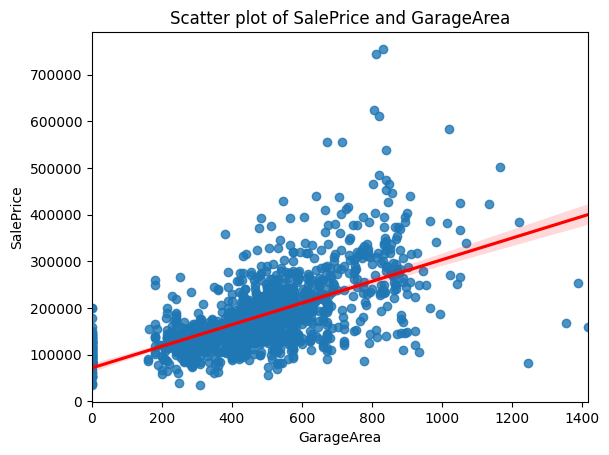

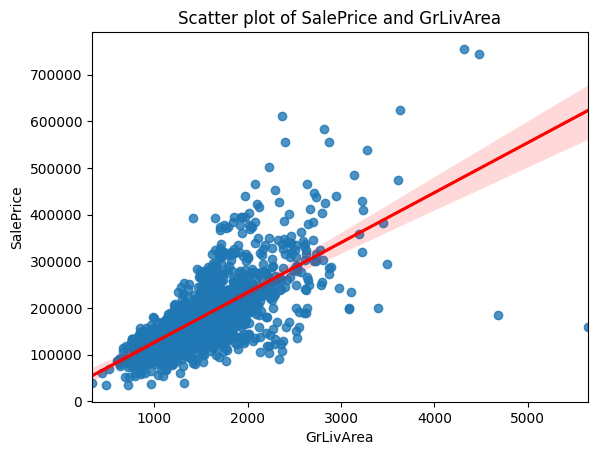

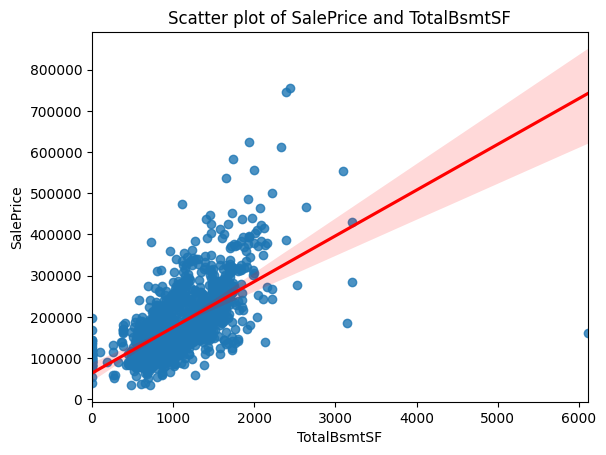

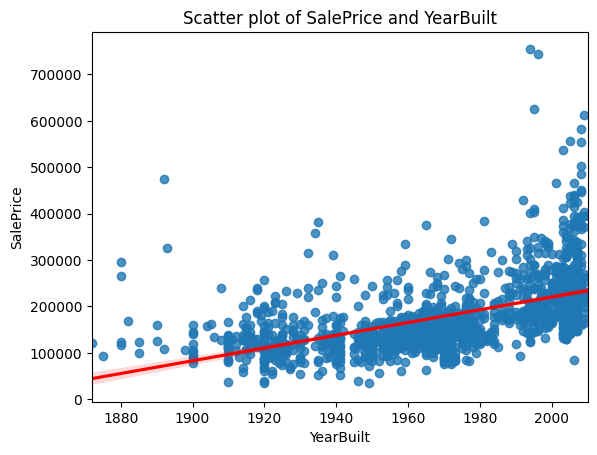

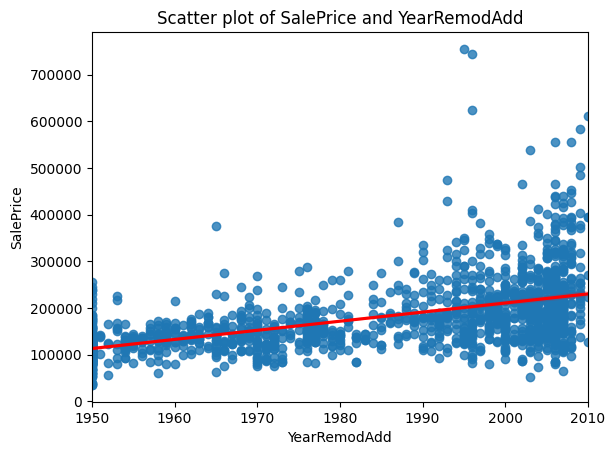

In [25]:
import seaborn as sns

for category in numerical_variables:
    plt.figure()
    sns.regplot(x=category, y="SalePrice", data=house_prices_clean_df, line_kws={"color": "red"}).set(
        title=f'Scatter plot of SalePrice and {category}')
    plt.savefig(f'docs/plots/scatter_plot_of_saleprice_and_{category}.png', bbox_inches='tight')


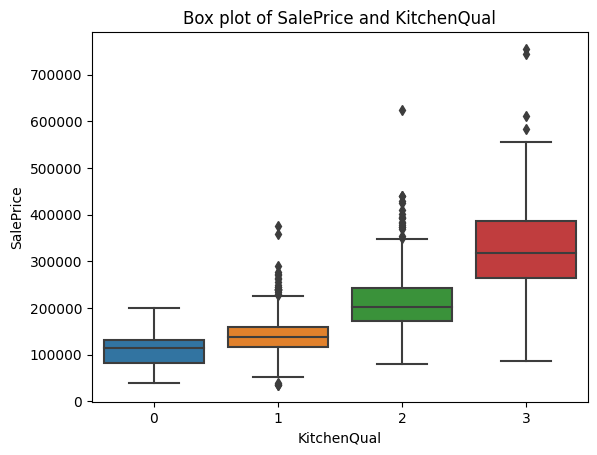

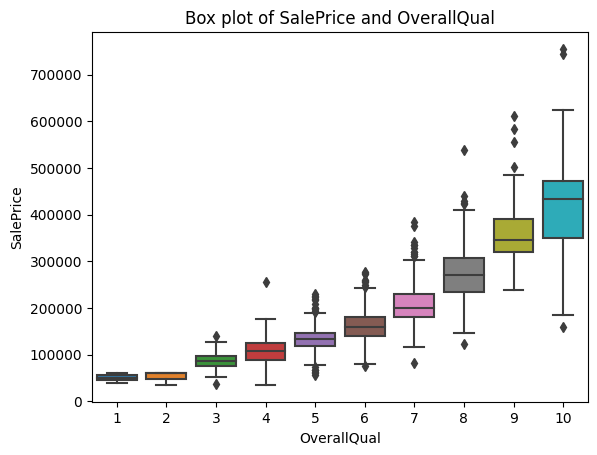

In [28]:
for category in categorical_variables:
    plt.figure()
    sns.boxplot(x=category, y="SalePrice", data=house_prices_clean_df).set(
        title=f'Box plot of SalePrice and {category}')
    plt.savefig(f'docs/plots/box-plot_of_saleprice_and_{category}.png', bbox_inches='tight')


## Analysis

#### Hypothesis One:
We can see that there is a positive relationship between SalePrice and 'GarageArea', 'GrLivArea', 'TotalBsmtSF'. As these factors increse in size, so does the house price. The null hypothesis is disproven, the alternative hypothesis is true.

#### Hypothesis Two:there is a positive relationship between SalePrice and 'KitchenQual'
We can see that , 'OverallQual'. As quality ratings increase, so does the house price. The null hypothesis  is disproven, the alternative hypothosis is true.

#### Hypothesis Two:
We can see that there is a positive relationship between SalePrice and 'YearBuilt', 'YearRemodAdd'. Newer houses and those recently remodelled have higher prices than older houses. The null hypothesis  is disproven, the alternative hypothosis is true.


---